In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_data = pd.read_csv('iris.csv')

iris_data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [22]:
#a)
varieties = list(set(iris_data.variety))

test_data = pd.DataFrame({})
subsets = [iris_data[iris_data.variety == variety].head(3)[['sepal.length', 'sepal.width', 'variety']] for variety in varieties]

test_data = pd.concat(subsets, ignore_index=True)


train_data = pd.DataFrame({})
subsets = [iris_data[iris_data.variety == variety][3:][['sepal.length', 'sepal.width', 'variety']] for variety in varieties]

train_data = pd.concat(subsets, ignore_index=True)

<Axes: xlabel='sepal.length', ylabel='sepal.width'>

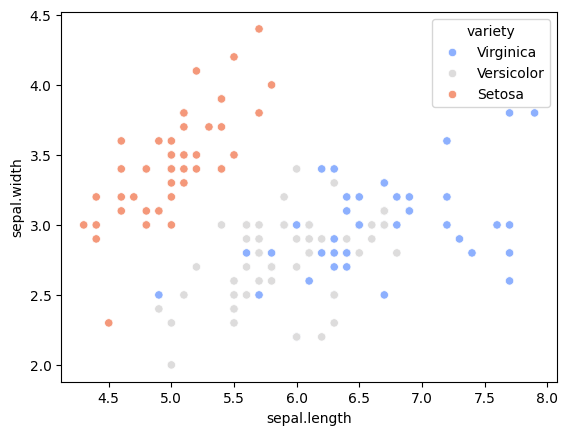

In [29]:
%matplotlib inline
sns.scatterplot(x='sepal.length', y='sepal.width',data=train_data, hue='variety', palette='coolwarm')

In [90]:
def euclidean_distance(x1,y1, x2, y2):
    return ((x2 - x1)**2 + (y2 - y1)**2)**0.5

test_data_np = test_data.to_numpy()
train_data_np = train_data.to_numpy()

distances = []

for val_test in test_data_np:
    dist = []
    for val_train in train_data_np:
        dist.append(euclidean_distance(val_train[0], val_train[1], val_test[0], val_test[1]))

    distances.append(dist)

distances

[[0.3999999999999999,
  0.3605551275463989,
  1.334166406412633,
  1.6124515496597092,
  1.0770329614269007,
  0.8944271909999159,
  0.9486832980505142,
  0.22360679774997896,
  0.6082762530298217,
  0.58309518948453,
  0.9999999999999997,
  0.7071067811865476,
  0.14142135623730964,
  0.3605551275463989,
  1.4866068747318508,
  1.565247584249853,
  1.1401754250991376,
  0.6082762530298225,
  0.8602325267042628,
  1.4866068747318508,
  0.5999999999999996,
  0.40000000000000036,
  0.905538513813742,
  0.5099019513592784,
  0.3605551275463989,
  0.5099019513592786,
  0.948683298050514,
  1.2083045973594577,
  1.6763054614240216,
  0.5099019513592786,
  0.5,
  0.7280109889280516,
  1.4317821063276357,
  0.10000000000000009,
  0.22360679774997896,
  0.4242640687119283,
  0.6324555320336763,
  0.44721359549995815,
  0.6324555320336763,
  0.7810249675906652,
  0.5099019513592784,
  0.40000000000000036,
  0.5000000000000002,
  0.7999999999999998,
  0.3605551275463989,
  0.1414213562373093,
  

In [91]:
nearest_neighbors = []
k = 5

for test_pt in distances:
    nearest_neighbors.append(np.argsort(test_pt)[:k])

nearest_neighbors

[array([50, 33, 45, 12, 34]),
 array([61, 39, 76, 11, 86]),
 array([26, 38, 36,  4, 22]),
 array([17, 38, 36, 22, 40]),
 array([12,  7, 34, 50, 33]),
 array([36, 38, 17,  9, 40]),
 array([108, 131, 134, 130, 118]),
 array([116, 100, 125, 103, 136]),
 array([120, 138, 121,  94, 115])]

In [92]:
predicted_class = []

for test_pt in nearest_neighbors:
    l=train_data_np[test_pt]

    count = {key: 0 for key in varieties}
    for val in test_pt:
        count[train_data.loc[val].variety] += 1
    predicted_class.append(max(count, key=lambda x: count[x]))

predicted_class

['Virginica',
 'Versicolor',
 'Virginica',
 'Virginica',
 'Virginica',
 'Virginica',
 'Setosa',
 'Setosa',
 'Setosa']

In [93]:
actual_class = test_data.variety

correct_predictions = [actual_class[i] == predicted_class[i] for i in range(len(actual_class))]

accuracy = sum(correct_predictions) / len(actual_class)

print('Manual Accuracy: ',accuracy)

Manual Accuracy:  0.5555555555555556


In [79]:
from sklearn.neighbors import KNeighborsClassifier

x_train = train_data.drop(['variety'], axis=1)
y_train = train_data['variety']

x_test = test_data.drop(['variety'], axis=1)
y_test = test_data['variety']

model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)
print('Sklearn accuracy: ',model.score(x_test, y_test))

Sklearn accuracy:  0.5555555555555556


In [80]:
test_data = pd.DataFrame({})
subsets = [iris_data[iris_data.variety == variety].head(3) for variety in varieties]

test_data = pd.concat(subsets, ignore_index=True)


train_data = pd.DataFrame({})
subsets = [iris_data[iris_data.variety == variety][3:] for variety in varieties]

train_data = pd.concat(subsets, ignore_index=True)

In [95]:
def euclidean_distance(x, y):
    d=[]
    for i in range(len(x)):
        d.append((x[i] - y[i])**2)
    return sum(d)**0.5
    
test_data_np = test_data.to_numpy()
train_data_np = train_data.to_numpy()

distances = []

for val_test in test_data_np:
    dist = []
    for val_train in train_data_np:
        dist.append(euclidean_distance(val_train[0:4], val_test[0:4]))

    distances.append(dist)

distances

[[0.9,
  0.5099019513592784,
  1.5165750888103098,
  2.343074902771996,
  1.3190905958272918,
  1.1532562594670794,
  0.953939201416946,
  1.0535653752852743,
  1.104536101718726,
  0.8660254037844385,
  1.4999999999999998,
  1.148912529307606,
  0.7416198487095665,
  0.9327379053088815,
  1.6703293088490068,
  1.8165902124584954,
  1.8165902124584947,
  0.7071067811865479,
  1.4832396974191324,
  1.7175564037317672,
  1.435270009440732,
  0.6403124237432849,
  1.14455231422596,
  1.4798648586948744,
  1.352774925846868,
  0.761577310586391,
  1.3228756555322954,
  1.3527749258468686,
  1.7944358444926367,
  0.7141428428542852,
  1.4352700094407325,
  1.3784048752090223,
  1.4491376746189442,
  0.42426406871192884,
  0.8888194417315588,
  1.452583904633395,
  0.9591663046625439,
  0.6082762530298224,
  1.1180339887498953,
  1.3341664064126335,
  0.5567764362830022,
  0.5000000000000002,
  0.9643650760992954,
  1.414213562373095,
  1.0099504938362076,
  0.6480740698407857,
  1.244989959

In [96]:
nearest_neighbors = []
k = 5

for test_pt in distances:
    nearest_neighbors.append(np.argsort(test_pt)[:k])

nearest_neighbors

[array([33, 41,  1, 40, 37]),
 array([39, 10, 18, 46, 77]),
 array([22, 17, 40, 27,  9]),
 array([80, 59, 70, 52, 69]),
 array([50, 69, 59, 80, 85]),
 array([80, 71, 70, 52, 59]),
 array([108,  95, 130, 119, 118]),
 array([125, 136, 103, 100, 116]),
 array([138,  94, 103,  97, 136])]

In [97]:
predicted_class = []

for test_pt in nearest_neighbors:
    l=train_data_np[test_pt]

    count = {key: 0 for key in varieties}
    for val in test_pt:
        count[train_data.loc[val].variety] += 1
    predicted_class.append(max(count, key=lambda x: count[x]))

predicted_class

['Virginica',
 'Virginica',
 'Virginica',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Setosa',
 'Setosa',
 'Setosa']

In [98]:
actual_class = test_data.variety

correct_predictions = [actual_class[i] == predicted_class[i] for i in range(len(actual_class))]

accuracy = sum(correct_predictions) / len(actual_class)

print('Manual Accuracy: ',accuracy)

Manual Accuracy:  1.0


In [99]:
x_train = train_data.drop(['variety'], axis=1)
y_train = train_data['variety']

x_test = test_data.drop(['variety'], axis=1)
y_test = test_data['variety']

model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)
print('Sklearn accuracy: ',model.score(x_test, y_test))

Sklearn accuracy:  1.0
